In [58]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
import torch
import sys
sys.path.append("..")
#from utils.model import Net_mask
from utils.data import Data
#from scripts import data_example as dem
#import torch
#import numpy as np
import matplotlib.pyplot as plt
from torch.distributions.multivariate_normal import MultivariateNormal

In [60]:
sigma2_eps_1 = 1  #red
sigma2_eps_2 = 1     #blue
tau2_1 = 1000 #red
tau2_2 = 0.001 #blue

In [61]:
# 1
tensor_D = torch.tensor(
    [[1, -1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, -1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0,  1, -1, 0, 0, 0, 0, 0, 0],
    [0, 0,  0, 1, -1, 0, 0, 0, 0, 0],
    [0, 0,  0, 0, 1, -1, 0, 0, 0, 0],
    [0, 0,  0, 0, 0, 1, -1, 0, 0, 0],
    [0, 0,  0, 0, 0, 0, 1, -1, 0, 0],
    [0, 0,  0, 0, 0, 0, 0, 1, -1, 0],
    [0, 0,  0, 0, 0, 0, 0, 0, 1, -1],
    [-1, 0, 0, 0, 0, 0, 0, 0, 0, 1],], dtype=torch.float
)
tensor_Q_m = torch.mm(torch.t(tensor_D), tensor_D) 
n_param = tensor_D.size(dim=0)
#inversion_noise = 0.001 # is big
tensor_Q_m_modified = tensor_Q_m + torch.eye(n_param)*(1./tau2_1)
tensor_Sigma_m = torch.inverse(tensor_Q_m_modified)
tensor_mu_m = torch.zeros(n_param)
tensor_mu_eps = torch.zeros(n_param)
#sigma2_eps = 0.1
tensor_Sigma_eps = torch.eye(n_param)*sigma2_eps_1
tensor_mu_d = tensor_mu_m
tensor_Sigma_d_1 = tensor_Sigma_m + tensor_Sigma_eps
print(tensor_Q_m)
print(tensor_Q_m_modified)
tensor_Sigma_d_1


tensor([[ 2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.],
        [-1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.],
        [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2.]])
tensor([[ 2.0010, -1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000, -1.0000],
        [-1.0000,  2.0010, -1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000, -1.0000,  2.0010, -1.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000, -1.0000,  2.0010, -1.0000,  0.0000,  0.0000, 

tensor([[101.8307, 100.3811, 100.0319,  99.7827,  99.6333,  99.5835,  99.6333,
          99.7827, 100.0319, 100.3811],
        [100.3811, 101.8307, 100.3811, 100.0319,  99.7827,  99.6333,  99.5835,
          99.6333,  99.7827, 100.0319],
        [100.0319, 100.3811, 101.8307, 100.3811, 100.0319,  99.7827,  99.6333,
          99.5835,  99.6333,  99.7827],
        [ 99.7827, 100.0319, 100.3811, 101.8307, 100.3811, 100.0319,  99.7827,
          99.6333,  99.5835,  99.6333],
        [ 99.6333,  99.7827, 100.0319, 100.3811, 101.8307, 100.3811, 100.0319,
          99.7827,  99.6333,  99.5835],
        [ 99.5835,  99.6333,  99.7827, 100.0319, 100.3811, 101.8307, 100.3811,
         100.0319,  99.7827,  99.6333],
        [ 99.6333,  99.5835,  99.6333,  99.7827, 100.0319, 100.3811, 101.8307,
         100.3811, 100.0319,  99.7827],
        [ 99.7827,  99.6333,  99.5835,  99.6333,  99.7827, 100.0319, 100.3811,
         101.8307, 100.3811, 100.0319],
        [100.0319,  99.7827,  99.6333,  99.5835,

In [62]:
# 2
n_param = tensor_D.size(dim=0)
#inversion_noise = 10000 # is big
tensor_Q_m_modified = tensor_Q_m + torch.eye(n_param)*(1/tau2_2)
tensor_Sigma_m = torch.inverse(tensor_Q_m_modified)
tensor_mu_m = torch.zeros(n_param)
tensor_mu_eps = torch.zeros(n_param)
#sigma2_eps = 10
tensor_Sigma_eps = torch.eye(n_param)*sigma2_eps_2
tensor_mu_d = tensor_mu_m
tensor_Sigma_d_2 = tensor_Sigma_m + tensor_Sigma_eps
tensor_Sigma_d_2


tensor([[1.0010e+00, 9.9601e-07, 9.9403e-10, 9.9204e-13, 9.9007e-16, 1.9762e-18,
         9.9007e-16, 9.9204e-13, 9.9403e-10, 9.9601e-07],
        [9.9601e-07, 1.0010e+00, 9.9601e-07, 9.9403e-10, 9.9204e-13, 9.9007e-16,
         1.9762e-18, 9.9007e-16, 9.9204e-13, 9.9403e-10],
        [9.9403e-10, 9.9601e-07, 1.0010e+00, 9.9601e-07, 9.9403e-10, 9.9204e-13,
         9.9007e-16, 1.9762e-18, 9.9007e-16, 9.9204e-13],
        [9.9204e-13, 9.9403e-10, 9.9601e-07, 1.0010e+00, 9.9601e-07, 9.9403e-10,
         9.9204e-13, 9.9007e-16, 1.9762e-18, 9.9007e-16],
        [9.9007e-16, 9.9204e-13, 9.9403e-10, 9.9601e-07, 1.0010e+00, 9.9601e-07,
         9.9403e-10, 9.9204e-13, 9.9007e-16, 1.9762e-18],
        [1.9762e-18, 9.9007e-16, 9.9204e-13, 9.9403e-10, 9.9601e-07, 1.0010e+00,
         9.9601e-07, 9.9403e-10, 9.9204e-13, 9.9007e-16],
        [9.9007e-16, 1.9762e-18, 9.9007e-16, 9.9204e-13, 9.9403e-10, 9.9601e-07,
         1.0010e+00, 9.9601e-07, 9.9403e-10, 9.9204e-13],
        [9.9204e-13, 9.9007

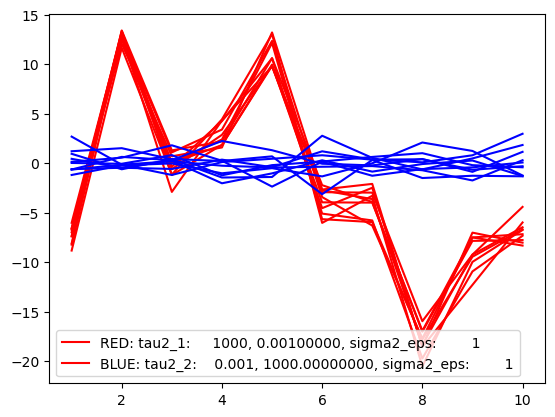

In [63]:
n = 10
#tensor_d_sample_1 =  MultivariateNormal(loc=tensor_mu_d, covariance_matrix=tensor_Sigma_d_1).sample(sample_shape=(n,))
#tensor_d_sample_2 =  MultivariateNormal(loc=tensor_mu_d, covariance_matrix=tensor_Sigma_d_2).sample(sample_shape=(n,))
tensor_d_sample_1 =  MultivariateNormal(loc=tensor_mu_d, covariance_matrix=tensor_Sigma_d_1).sample(sample_shape=(n,))
tensor_d_sample_2 =  MultivariateNormal(loc=tensor_mu_d, covariance_matrix=tensor_Sigma_d_2).sample(sample_shape=(n,))
#plt.plot(range(10), tensor_d_sample_1, 'r')
#plt.plot(range(10), tensor_d_sample_2, 'b')
plt.plot(range(1, n+1), tensor_d_sample_1, 'r')
plt.plot(range(1, n+1), tensor_d_sample_2, 'b')
leg1 = f'RED: tau2_1: {tau2_1:8}, {1./tau2_1:10.8f}, sigma2_eps: {sigma2_eps_1:8}'
leg2 = f'BLUE: tau2_2: {tau2_2:8}, {1./tau2_2:10.8f}, sigma2_eps: {sigma2_eps_2:8}'
plt.legend([leg1, leg2])
#plt.axis([0,11,-5,5])
#plt.plot(tensor_d_sample_1[2], 'r')
#plt.plot(tensor_d_sample_2[2], 'b')